In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

house_price_df = pd.read_csv('house_price_data.csv')
house_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


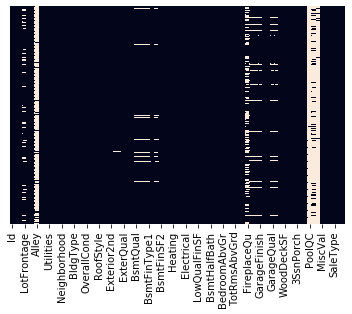

In [2]:
sns.heatmap(house_price_df.isnull(), yticklabels=False, cbar=False)

In [3]:
y = house_price_df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
house_price_df.drop(columns='SalePrice', inplace=True)

In [5]:
na_df = pd.DataFrame({'column_name': house_price_df.columns,
                     'na_count': house_price_df.isnull().sum(),
                     'na_percentage': house_price_df.isnull().sum()/len(house_price_df)*100})

na_df.sort_values(by='na_percentage', ascending=False)

,column_name,na_count,na_percentage
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
FireplaceQu,FireplaceQu,690,47.260274
...,...,...,...
TotalBsmtSF,TotalBsmtSF,0,0.000000
Heating,Heating,0,0.000000
MSSubClass,MSSubClass,0,0.000000
CentralAir,CentralAir,0,0.000000


In [6]:
cols_to_drop= list(na_df[na_df['na_percentage']>50].index)

for col in house_price_df.columns:
    if len(house_price_df[col].unique())==1 or len(house_price_df[col].unique())==house_price_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']

In [7]:
house_price_df.drop(columns=cols_to_drop, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house_price_df,y, test_size=0.2, random_state=42)


In [9]:
#num_cals = house_price_df.select_dtypes(include = ['float64', 'int64'])
#cat_cals = house_price_df.select_dtypes(include = ['O'])

In [10]:
num_col = [col for col in house_price_df.columns if house_price_df[col].dtype=='int64' or house_price_df[col].dtype=='float64']
cat_col= [col for col in house_price_df.columns if house_price_df[col].dtype=='object']

In [11]:
for col in num_col:
    X_train[col]=X_train[col].fillna(X_train[col].mean())
    X_test[col]=X_test[col].fillna(X_train[col].mean())


In [12]:
for col in cat_col:
    X_train[col]=X_train[col].fillna(X_train[col].mode()[0])
    X_test[col]=X_test[col].fillna(X_train[col].mode()[0])

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
minmaxscaler = StandardScaler()

In [14]:
for col in num_col:
    X_train[col]=minmaxscaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=minmaxscaler.transform(np.array(X_test[col]).reshape(-1,1))


In [15]:
from sklearn.preprocessing import OneHotEncoder

oe_train_df=pd.get_dummies(X_train[cat_col])
oe_test_df =pd.get_dummies(X_test[cat_col])

In [16]:
X_train_oe, X_test_oe = oe_train_df.align(oe_test_df,axis=1,join='inner',fill_value=0)

In [17]:
X_train_final = pd.concat([X_train_oe, X_train[num_col]], axis=1)
X_test_final = pd.concat([X_test_oe, X_test[num_col]], axis=1)

## Linear Model

In [18]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_final,y_train)


predictions = linear.predict(X_test_final)

In [19]:
predictions

array([153856., 343872.,  98880., 184320., 338176.,  59520., 247296.,
       154432.,  53248., 142080., 149312., 107264.,  63872., 229504.,
       176640., 138112., 187712., 131968., 134208., 209664., 166272.,
       202176., 179136., 129920., 201024., 139072., 198976., 103680.,
       172096., 207360., 165696., 272000., 243712., 119040., 245760.,
       143232., 140032., 204096., 319040., 111296., 134784., 225664.,
        95104., 348800., 130688., 140992., 102784., 137344., 402304.,
       140160., 120704., 259904.,  90432., 281152., 162688., 228096.,
       208704., 179136., 128768., 102016.,  73856., 166912., 318784.,
       260480., 312128., 193600.,  94592., 291712., 121984., 177088.,
       126464., 121984., 107392.,  61312., 437376., 179968., 303360.,
       379648., 150080., 121472., 116352.,  23360., 125184., 104960.,
       163712., 156160., 248960., 205504., 132544., 196608., 133056.,
       156096., 183424., 262592., 121152., 189248., 207168., 151936.,
       202304., 2753

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, predictions)

0.8748803131636336

In [21]:
mean_squared_error(y_test, predictions)

959708812.9760274

## Lasso And Ridge

In [22]:
from sklearn.linear_model import Lasso

def lasso(alphas):
    df =pd.DataFrame()
    df['Feature']= X_train_final.columns
    
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train_final,y_train)
        col_name = 'Alpha =%f' % alpha
        df[col_name]= lasso.coef_
    return df

lasso([1,0.5, -1.2]).head(25)

,Feature,Alpha =1.000000,Alpha =0.500000,Alpha =-1.200000
0,MSZoning_C (all),-2.629391e+04,-2.679671e+04,-55163.766753
1,MSZoning_FV,1.017959e+04,1.016104e+04,-16202.997607
2,MSZoning_RH,-3.801695e+03,-4.027101e+03,-30984.859119
3,MSZoning_RL,8.767485e+02,7.810463e+02,-25827.921825
4,MSZoning_RM,-0.000000e+00,-0.000000e+00,-26490.480053
5,Street_Grvl,-1.757958e+04,-1.788798e+04,-720561.343551
6,Street_Pave,1.874522e-09,1.854444e-09,-703208.247423
7,LotShape_IR1,-1.074381e+03,-1.069410e+03,-12831.872615
8,LotShape_IR2,7.483582e+03,7.500774e+03,-4285.257651
9,LotShape_IR3,-1.601741e+04,-1.596202e+04,-27206.415722


In [23]:
from sklearn.linear_model import RidgeClassifier

rid = RidgeClassifier()

ridge = rid.fit(X_train_final, y_train)

ridge.score(X_train_final, y_train)

0.8664383561643836

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor()

dtr.fit(X_train_final,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
dtr.predict(X_test_final)

array([157900., 410000., 120000., 159000., 325000.,  86000., 205000.,
       148500.,  86000., 112000., 189950., 106500.,  90000., 201000.,
       179000., 147000., 195000., 135000., 113000., 208500., 104900.,
       233230., 183200., 109900., 180500., 179200., 164990.,  90000.,
       168000., 196000., 128000., 233000., 189000., 112500., 256300.,
       128900., 104900., 155000., 275500., 124000., 109500., 263000.,
       112500., 325624., 126500., 200000., 114500., 139000., 446261.,
       128500., 106500., 193500., 116000., 423000., 140000., 216837.,
       190000., 142500., 157000., 116000.,  90350., 181000., 361919.,
       285000., 245350., 239000., 100000., 440000., 123500., 168500.,
       112000., 139000.,  97000.,  88000., 501837., 179200., 290000.,
       260000., 139000., 130000.,  83000., 100000., 126500.,  80000.,
       182900., 138887., 270000., 234000., 131500., 200141., 124900.,
       197500., 130000., 294000., 100000., 180000., 129900., 155000.,
       227000., 1920

In [26]:
dtr.score(X_test_final, y_test)

0.7462820731918873

In [27]:
print('Training Accurecy: ', dtr.score(X_train_final,y_train))

print('Test Accrecy:', dtr.score(X_test_final,y_test))

Training Accurecy:  1.0
Test Accrecy: 0.7462820731918873


In [28]:
# if the test accurecy is changing by running multiple times, it means your model is overfit.
# by avoid this, you need to change default value of random state 
# i.e dtr = DecisionTreeRegressor(random_state = 'any value' ex: 42)

## variance_inflation_factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(X_train[num_col].values, i) for i in range(X_train[num_col].shape[1])]

vif['Features'] = X_train[num_col].columns

vif

,VIF Factor,Features
0,1.678579,MSSubClass
1,1.550509,LotFrontage
2,1.258606,LotArea
3,3.184199,OverallQual
4,1.586181,OverallCond
5,5.094617,YearBuilt
6,2.422516,YearRemodAdd
7,1.410436,MasVnrArea
8,inf,BsmtFinSF1
9,inf,BsmtFinSF2


# RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor()

rand_reg.fit(X_train_final, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
rand_reg.predict(X_test_final)

array([140406.5 , 332946.69, 116841.5 , 154148.  , 318166.64,  87085.  ,
       207033.27, 151974.75,  85934.83, 123346.25, 153840.4 , 122486.5 ,
       112930.  , 210872.35, 179043.4 , 131056.25, 194419.4 , 136307.25,
       118145.5 , 208972.7 , 166798.45, 223411.12, 177871.7 , 125224.83,
       199400.49, 174126.01, 182832.57, 108444.  , 177814.85, 192501.82,
       126432.64, 246275.36, 170080.4 , 111354.75, 255403.66, 144475.  ,
       137451.05, 203231.58, 311160.24, 109075.32, 124416.  , 236754.45,
       119614.58, 352230.66, 136377.7 , 146565.65, 116491.33, 129052.5 ,
       383590.57, 143735.3 , 122889.  , 193258.78, 126907.36, 355482.68,
       140084.32, 243164.07, 193209.83, 151118.87, 143264.36, 113634.15,
        76888.  , 150335.75, 307407.47, 278963.91, 281359.51, 212559.59,
       114038.54, 305767.14, 116194.75, 164551.21, 128320.7 , 128132.75,
       113991.  ,  91443.5 , 455992.61, 175748.24, 309244.  , 302958.4 ,
       135530.33, 125740.  ,  96236.  , 100825.  , 

In [32]:
print('Training Accurecy: ', rand_reg.score(X_train_final,y_train))

print('Test Accrecy:', rand_reg.score(X_test_final,y_test))

Training Accurecy:  0.9782886487230624
Test Accrecy: 0.8917697343756367


# GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

hyp_dict = { 'max_depth': [10,16,18],
             'min_samples_split' : [8,10,14],
             'max_leaf_nodes': [8,13,16]
           }
gcv = GridSearchCV(estimator=dtr, param_grid=hyp_dict, cv=5)

gcv.fit(X_train_final, y_train)

gcv.best_params_

{'max_depth': 16, 'max_leaf_nodes': 16, 'min_samples_split': 14}

In [34]:
gcv.best_score_

0.6640505867094028

In [35]:
gcv.predict(X_test_final)

array([145604.20467836, 366304.7       , 145604.20467836, 179729.53107345,
       344700.        , 113133.07116105, 201482.63841808, 179729.53107345,
       113133.07116105, 146228.76576577, 155780.70967742, 113133.07116105,
       113133.07116105, 201482.63841808, 179729.53107345, 145604.20467836,
       201482.63841808, 145604.20467836, 145604.20467836, 201482.63841808,
       146228.76576577, 231456.21052632, 179729.53107345, 113133.07116105,
       201482.63841808, 145604.20467836, 201482.63841808, 113133.07116105,
       179729.53107345, 201482.63841808, 113133.07116105, 253941.8       ,
       146228.76576577, 113133.07116105, 231456.21052632, 145604.20467836,
       146228.76576577, 201482.63841808, 283391.68965517, 113133.07116105,
       113133.07116105, 253941.8       , 113133.07116105, 366304.7       ,
       145604.20467836, 179729.53107345, 113133.07116105, 113133.07116105,
       514206.2       , 146228.76576577, 113133.07116105, 179729.53107345,
       113133.07116105, 3

In [36]:
gcv.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [37]:
gcv.score(X_test_final, y_test)

0.8120267392153868

# Hyperparameter Tunning

In [38]:
from sklearn.model_selection import RandomizedSearchCV

hype_dict = { 'max_depth': [10,16,18],
             'min_samples_split' : [8,10,14],
             'max_leaf_nodes': [8,13,16]
           }
gcv_ran = RandomizedSearchCV(estimator=dtr, param_distributions=hype_dict, cv=5, n_iter = 24)

gcv_ran.fit(X_train_final, y_train)

print('Best Score =' , gcv_ran.best_score_)
print('Where we got best score =', gcv_ran.best_params_)

Best Score = 0.6783338840871956
Where we got best score = {'min_samples_split': 14, 'max_leaf_nodes': 16, 'max_depth': 10}


In [39]:
gcv_prediction = gcv_ran.predict(X_test_final)
gcv_prediction

array([145604.20467836, 366304.7       , 145604.20467836, 179729.53107345,
       344700.        , 113133.07116105, 201482.63841808, 179729.53107345,
       113133.07116105, 146228.76576577, 155780.70967742, 113133.07116105,
       113133.07116105, 201482.63841808, 179729.53107345, 145604.20467836,
       201482.63841808, 145604.20467836, 145604.20467836, 201482.63841808,
       146228.76576577, 231456.21052632, 179729.53107345, 113133.07116105,
       201482.63841808, 145604.20467836, 201482.63841808, 113133.07116105,
       179729.53107345, 201482.63841808, 113133.07116105, 253941.8       ,
       146228.76576577, 113133.07116105, 231456.21052632, 145604.20467836,
       146228.76576577, 201482.63841808, 283391.68965517, 113133.07116105,
       113133.07116105, 253941.8       , 113133.07116105, 366304.7       ,
       145604.20467836, 179729.53107345, 113133.07116105, 113133.07116105,
       514206.2       , 146228.76576577, 113133.07116105, 179729.53107345,
       113133.07116105, 3